In [1]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import json
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors

import h5py
from ipyfilechooser import FileChooser

from alvra_tools import *
from alvra_tools.channels import *
from alvra_tools.XAS_functions import *
from scipy.stats.stats import pearsonr


import warnings
warnings.filterwarnings('ignore')

# Load the full scan

In [2]:
fc = FileChooser('/sf/alvra/data/p19262/raw/scan_info/')  #this is for RC
fc.use_dir_icons = True
display(fc)

FileChooser(path='/sf/alvra/data/p19262/raw/scan_info', filename='', title='HTML(value='', layout=Layout(displ…

In [6]:
quantile_corr = 0.6

detector_XAS_1 = channel_diode_1
#detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero122

#######################################################################################################33

Signal_APD1, IzeroFEL, correlation, Position_mm = \
XAS_scan_1diode_static(fc.selected, detector_XAS_1, detector_Izero, quantile_corr)

#Signal_APD1, Signal_APD2, IzeroFEL, correlation1, correlation2, Position_mm = \
#XAS_scan_2diodes_static(fc.selected, detector_XAS_1, detector_XAS_2, detector_Izero, quantile_corr)

/sf/alvra/data/p19262/raw/scan_info/285_jetScan_CpRhCO2_3007eV_APD1.json

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   502 / 502 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  502 / 502 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY 502 / 502 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 502 / 502 -> 0% loss
complete channels: 3 / 3 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
(300,) shots out of (502,) survived
Step 21 of 21: Processed run_014321
correlation Diode (all shots) = 0.9568316050681872


## Plot only 1 diode

<IPython.core.display.Javascript object>


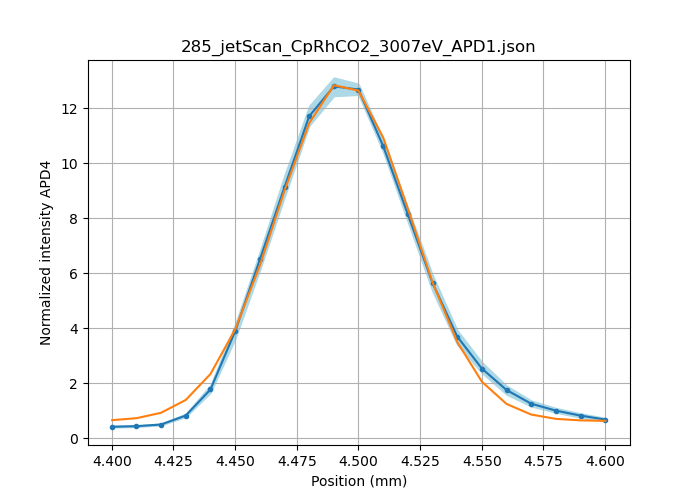

Center position = 4.494 mm
Width = 63.766 um


In [10]:
Int_APD1 = Signal_APD1[:,0]
err_low_APD1 = Signal_APD1[:,1]
err_high_APD1 = Signal_APD1[:,2]

fit = Fit(gaussian, estimate_gaussian_parameters)

fit.estimate(Position_mm, Int_APD1)            # this sets some internal params 
#fit.p0 = better_p0(fit.p0, 0, 210.42) # overwrite some values (index) if needed: 

fit.fit(Position_mm, Int_APD1)                  # calculate the fit
Int_fit = fit.eval(Position_mm)            # evaluate the curve for plotting

center = fit.popt[0]
width = fit.popt[2]*2.355

plt.figure(figsize=(7,5))
plt.title(fc.selected_filename)
plt.plot(Position_mm, Int_APD1, label='direction X, APD1, {}%'.format(quantile_corr*100),marker='.')
plt.fill_between(Position_mm, err_low_APD1, err_high_APD1, color='lightblue')
plt.plot(Position_mm, Int_fit)
plt.xlabel("Position (mm)")
plt.ylabel("Normalized intensity APD4")

plt.grid()
plt.show()

print("Center position = {:.3f} mm".format(center))
print("Width = {:.3f} um".format(width*1000))
#print("Bandwidth = {} %".format(np.abs(np.round(width,3))/np.round(center,3)*100))

## Plot 2 diodes

<IPython.core.display.Javascript object>


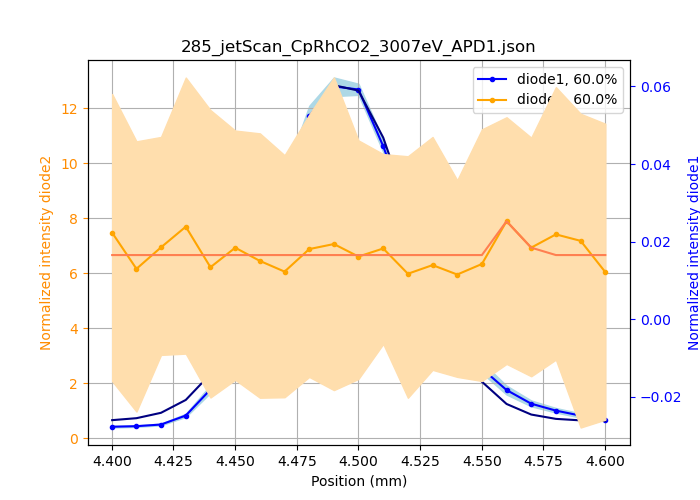

In [24]:
Int_APD1 = Signal_APD1[:,0]
err_low_APD1 = Signal_APD1[:,1]
err_high_APD1 = Signal_APD1[:,2]

Int_APD2 = Signal_APD2[:,0]
err_low_APD2 = Signal_APD2[:,1]
err_high_APD2 = Signal_APD2[:,2]

###########################################

fit = Fit(gaussian, estimate_gaussian_parameters)

fit.estimate(Position_mm, Int_APD1)            # this sets some internal params 
#fit.p0 = better_p0(fit.p0, 0, 210.42) # overwrite some values (index) if needed: 
fit.fit(Position_mm, Int_APD1)                  # calculate the fit
Int_fit1 = fit.eval(Position_mm)            # evaluate the curve for plotting
center1 = fit.popt[0]
width1 = fit.popt[2]*2.355

fit.estimate(Position_mm, Int_APD2)            # this sets some internal params 
#fit.p0 = better_p0(fit.p0, 0, 210.42) # overwrite some values (index) if needed: 
fit.fit(Position_mm, Int_APD2)                  # calculate the fit
Int_fit2 = fit.eval(Position_mm)            # evaluate the curve for plotting
center2 = fit.popt[0]
width2 = fit.popt[2]*2.355

###########################################

fig = plt.figure(figsize = (7,5))

ax1 = fig.add_subplot(111)
ax2 = plt.twinx(ax1)

ax2._get_lines.prop_cycler = ax1._get_lines.prop_cycler

lns1 = ax1.plot(Position_mm, Int_APD1, label='diode1, {}%'.format(quantile_corr*100),marker='.', color='b')
ax1.fill_between(Position_mm, err_low_APD1, err_high_APD1, color='lightblue')
ax1.plot(Position_mm, Int_fit1, color='navy')

lns2 = ax2.plot(Position_mm, Int_APD2, label='diode2, {}%'.format(quantile_corr*100),marker='.', color='orange')
ax2.fill_between(Position_mm, err_low_APD2, err_high_APD2, color='navajowhite')
ax2.plot(Position_mm, Int_fit2, color='coral')


plt.title(fc.selected_filename)

ax1.set_xlabel("Position (mm)")

ax1.set_ylabel ("Normalized intensity diode2")
ax1.tick_params(axis='y', colors='darkorange')
ax1.yaxis.label.set_color('darkorange')

ax2.set_ylabel ("Normalized intensity diode1")
ax2.tick_params(axis='y', colors='b')
ax2.yaxis.label.set_color('b')


leg = lns1 + lns2
labels = [l.get_label() for l in leg]
ax1.legend(leg, labels, loc='best')
ax1.grid()

plt.show()